In [ ]:
!pip install ucimlrepo
!pip install bayesian-optimization

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import NuSVC
from sklearn.metrics import accuracy_score
from bayes_opt import BayesianOptimization

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
dry_bean = fetch_ucirepo(id=602)

# data (as pandas dataframes)
X = dry_bean.data.features
y = dry_bean.data.targets

# metadata
print(dry_bean.metadata)

# variable information
print(dry_bean.variables)


{'uci_id': 602, 'name': 'Dry Bean', 'repository_url': 'https://archive.ics.uci.edu/dataset/602/dry+bean+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/602/data.csv', 'abstract': 'Images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. A total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 13611, 'num_features': 16, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Thu Mar 28 2024', 'dataset_doi': '10.24432/C50S4B', 'creators': [], 'intro_paper': {'ID': 244, 'type': 'NATIVE', 'title': 'Multiclass classification of dry beans using computer vision and machine learning techniques', 'authors': 'M. Koklu, Ilker Ali Özkan', 'venue': 'Co

In [ ]:
print("First few rows of features (X):")
print(X.head())

First few rows of features (X):
    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRatio  \
0  28395    610.291       208.178117       173.888747     1.197191   
1  28734    638.018       200.524796       182.734419     1.097356   
2  29380    624.110       212.826130       175.931143     1.209713   
3  30008    645.884       210.557999       182.516516     1.153638   
4  30140    620.134       201.847882       190.279279     1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  Roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  
0     0.913

In [ ]:
print("\nFirst few rows of targets (y):")
print(y.head())


First few rows of targets (y):
   Class
0  SEKER
1  SEKER
2  SEKER
3  SEKER
4  SEKER


In [ ]:
print(y)

          Class
0         SEKER
1         SEKER
2         SEKER
3         SEKER
4         SEKER
...         ...
13606  DERMASON
13607  DERMASON
13608  DERMASON
13609  DERMASON
13610  DERMASON

[13611 rows x 1 columns]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y.to_numpy().ravel(), test_size=0.3, random_state=42)

In [ ]:
# kernels = ['linear', 'poly', 'sigmoid', 'rbf', 'anovadot']
kernels=['rbf', 'poly', 'linear']
pbounds = {'kernel': (0, len(kernels)-1),
           'nu': (0.01, 0.1),
           'tol': (1e-6, 1.0)}

In [ ]:
def evaluate_svm(kernel, nu, tol):
  kernel_name = kernels[int(kernel)]
  model = NuSVC(kernel=kernel_name, nu=nu, tol=tol)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  return accuracy

In [ ]:
# results = []
# optimizers = []
# for sample in range(1):
#   optimizer = BayesianOptimization(evaluate_svm, pbounds)
#   optimizer.maximize(init_points=5, n_iter=20)
#   best_params = optimizer.max['params']
#   best_accuracy = optimizer.max['target']
#   results.append((sample, best_accuracy, best_params))
#   optimizers.append(optimizer)

results = []
optimizers = []
targets = []  # Store target values (accuracy scores)
iteration_counts = []  # Store iteration counts

for sample in range(10):
    optimizer = BayesianOptimization(evaluate_svm, pbounds)
    optimizer.maximize(init_points=5, n_iter=100)
    best_params = optimizer.max['params']
    best_accuracy = optimizer.max['target']
    results.append((sample, best_accuracy, best_params))
    optimizers.append(optimizer)

    # Store target values and iteration counts
    targets.append(optimizer._space.target)
    iteration_counts.append(optimizer._space.params.shape[0])

|   iter    |  target   |  kernel   |    nu     |    tol    |
-------------------------------------------------------------
| 1         | 0.4696    | 1.596     | 0.06395   | 0.8763    |
| 2         | 0.5186    | 1.574     | 0.09536   | 0.6694    |
| 3         | 0.4775    | 0.2026    | 0.05531   | 0.6862    |
| 4         | 0.5309    | 0.7194    | 0.02533   | 0.9658    |
| 5         | 0.526     | 0.09306   | 0.03791   | 0.6158    |
| 6         | 0.6112    | 1.7       | 0.08889   | 0.331     |
| 7         | 0.5884    | 1.411     | 0.0928    | 0.7444    |
| 8         | 0.475     | 0.6042    | 0.09265   | 0.1577    |
| 9         | 0.513     | 1.186     | 0.02033   | 0.5565    |
| 10        | 0.5193    | 0.4735    | 0.09574   | 0.1865    |
| 11        | 0.3107    | 0.9083    | 0.0539    | 0.6124    |
| 12        | 0.3766    | 0.581     | 0.01562   | 0.1344    |
| 13        | 0.5433    | 1.143     | 0.08364   | 0.7715    |
| 14        | 0.5113    | 1.745     | 0.06308   | 0.3414    |
| 15    

In [ ]:
table = pd.DataFrame(results, columns=['Sample', 'Best Accuracy', 'Best SVM Parameter'])
print(table)

   Sample  Best Accuracy                                 Best SVM Parameter
0       0       0.664300  {'kernel': 1.2465218756147325, 'nu': 0.0675930...
1       1       0.700294  {'kernel': 1.762803201880102, 'nu': 0.07060391...
2       2       0.666748  {'kernel': 1.5412794855027425, 'nu': 0.0930822...
3       3       0.692703  {'kernel': 1.6963186898812195, 'nu': 0.0338138...
4       4       0.731391  {'kernel': 1.6185650023648501, 'nu': 0.0525604...
5       5       0.681440  {'kernel': 1.9256408750152858, 'nu': 0.0957477...
6       6       0.655730  {'kernel': 1.0778143941830713, 'nu': 0.0616397...
7       7       0.666014  {'kernel': 1.4825622278174964, 'nu': 0.0676030...
8       8       0.650833  {'kernel': 1.073354524610778, 'nu': 0.07115627...
9       9       0.684133  {'kernel': 1.1740012606058643, 'nu': 0.0586164...


In [ ]:
max_accuracy_sample = table.loc[table['Best Accuracy'].idxmax()]
print(f"Sample with maximum accuracy: {max_accuracy_sample['Sample']}")

Sample with maximum accuracy: 4


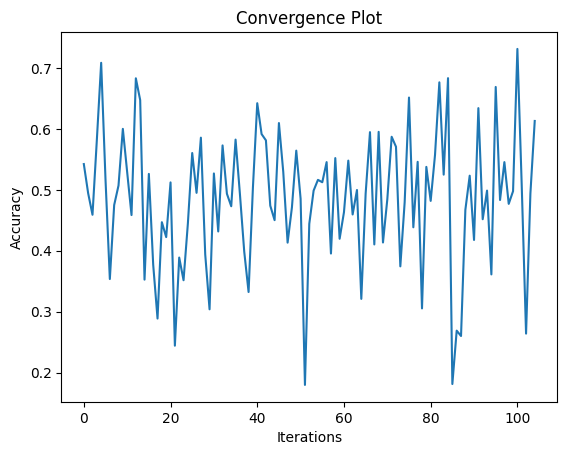

In [ ]:
max_accuracy_optimizer_idx = max_accuracy_sample['Sample']
iterations = range(iteration_counts[max_accuracy_optimizer_idx])
plt.plot(iterations, targets[max_accuracy_optimizer_idx][:iteration_counts[max_accuracy_optimizer_idx]])
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Plot')
plt.show()